In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
img_height, img_width = 28, 28
batch_size = 128

In [32]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    'Dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'Dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = len(train_generator.class_indices)
print(f"Classes: {train_generator.class_indices}")

Found 7886 images belonging to 63 classes.
Found 1947 images belonging to 63 classes.
Classes: {'a': 0, 'b': 1, 'ba': 2, 'be_bi': 3, 'bo_bu': 4, 'd': 5, 'da_ra': 6, 'de_di': 7, 'do_du': 8, 'e_i': 9, 'g': 10, 'ga': 11, 'ge_gi': 12, 'go_gu': 13, 'h': 14, 'ha': 15, 'he_hi': 16, 'ho_hu': 17, 'k': 18, 'ka': 19, 'ke_ki': 20, 'ko_ku': 21, 'l': 22, 'la': 23, 'le_li': 24, 'lo_lu': 25, 'm': 26, 'ma': 27, 'me_mi': 28, 'mo_mu': 29, 'n': 30, 'na': 31, 'ne_ni': 32, 'ng': 33, 'nga': 34, 'nge_ngi': 35, 'ngo_ngu': 36, 'no_nu': 37, 'o_u': 38, 'p': 39, 'pa': 40, 'pe_pi': 41, 'po_pu': 42, 'r': 43, 'ra': 44, 're_ri': 45, 'ro_ru': 46, 's': 47, 'sa': 48, 'se_si': 49, 'so_su': 50, 't': 51, 'ta': 52, 'te_ti': 53, 'to_tu': 54, 'w': 55, 'wa': 56, 'we_wi': 57, 'wo_wu': 58, 'y': 59, 'ya': 60, 'ye_yi': 61, 'yo_yu': 62}


In [33]:
X_train, y_train = next(train_generator)
X_val, y_val = next(val_generator)

print("Original shape:", X_train.shape)

Original shape: (128, 28, 28, 1)


In [34]:
X_train = X_train.reshape(-1, 28, 28)
X_val = X_val.reshape(-1, 28, 28)

In [35]:
model = Sequential([
    Input (shape=(28,28)),
    LSTM(768, return_sequences=True),
    LSTM(512),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 28, 768)        │     2,448,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 512)            │     2,623,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 63)             │        16,191 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,219,391 (19.91 MB)

 Trainable params: 5,219,391 (19.91 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:


history = model.fit(
    train_generator,
    validation_data=(val_generator),
    epochs=10,
    batch_size=128,
)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 621ms/step - accuracy: 0.0614 - loss: 3.8116 - val_accuracy: 0.2147 - val_loss: 2.6010
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 634ms/step - accuracy: 0.3364 - loss: 2.0208 - val_accuracy: 0.5403 - val_loss: 1.2876
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 631ms/step - accuracy: 0.5686 - loss: 1.1992 - val_accuracy: 0.6076 - val_loss: 1.0699
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 626ms/step - accuracy: 0.6529 - loss: 0.9658 - val_accuracy: 0.7093 - val_loss: 0.8317
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 38s 612ms/step - accuracy: 0.7435 - loss: 0.6991 - val_accuracy: 0.7601 - val_loss: 0.6578
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 38s 608ms/step - accuracy: 0.8203 - loss: 0.5072 - val_accuracy: 0.7889 - val_loss: 0.6041
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 587ms/step - accuracy: 0.8365 - loss: 0.4573 - val_accuracy: 0.7992 - val_loss: 0.5732
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 587ms/step - accuracy: 0.8864 - loss: 0.3360 - val_accu

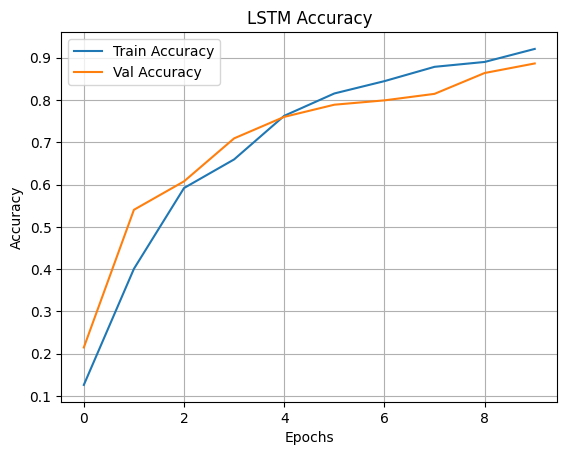

In [37]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
model.save('lstm_letter_recognizer.h5')
print("Model saved as lstm_letter_recognizer.h5")

Model saved as lstm_letter_recognizer.h5


In [44]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model = load_model('lstm_letter_recognizer.h5')

img_path = 'test letter.png'
img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
class_idx = np.argmax(prediction)

labels = list(train_generator.class_indices.keys())
predicted_letter = labels[class_idx]
print(f"Predicted Letter: {predicted_letter}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Predicted Letter: ho_hu


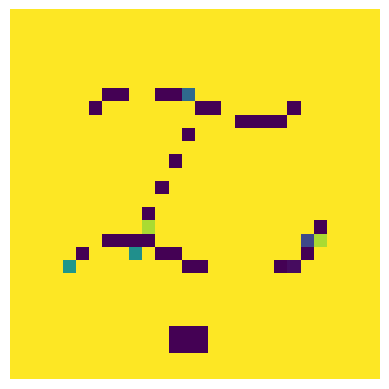

In [45]:
plt.imshow(img)
plt.axis('off')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


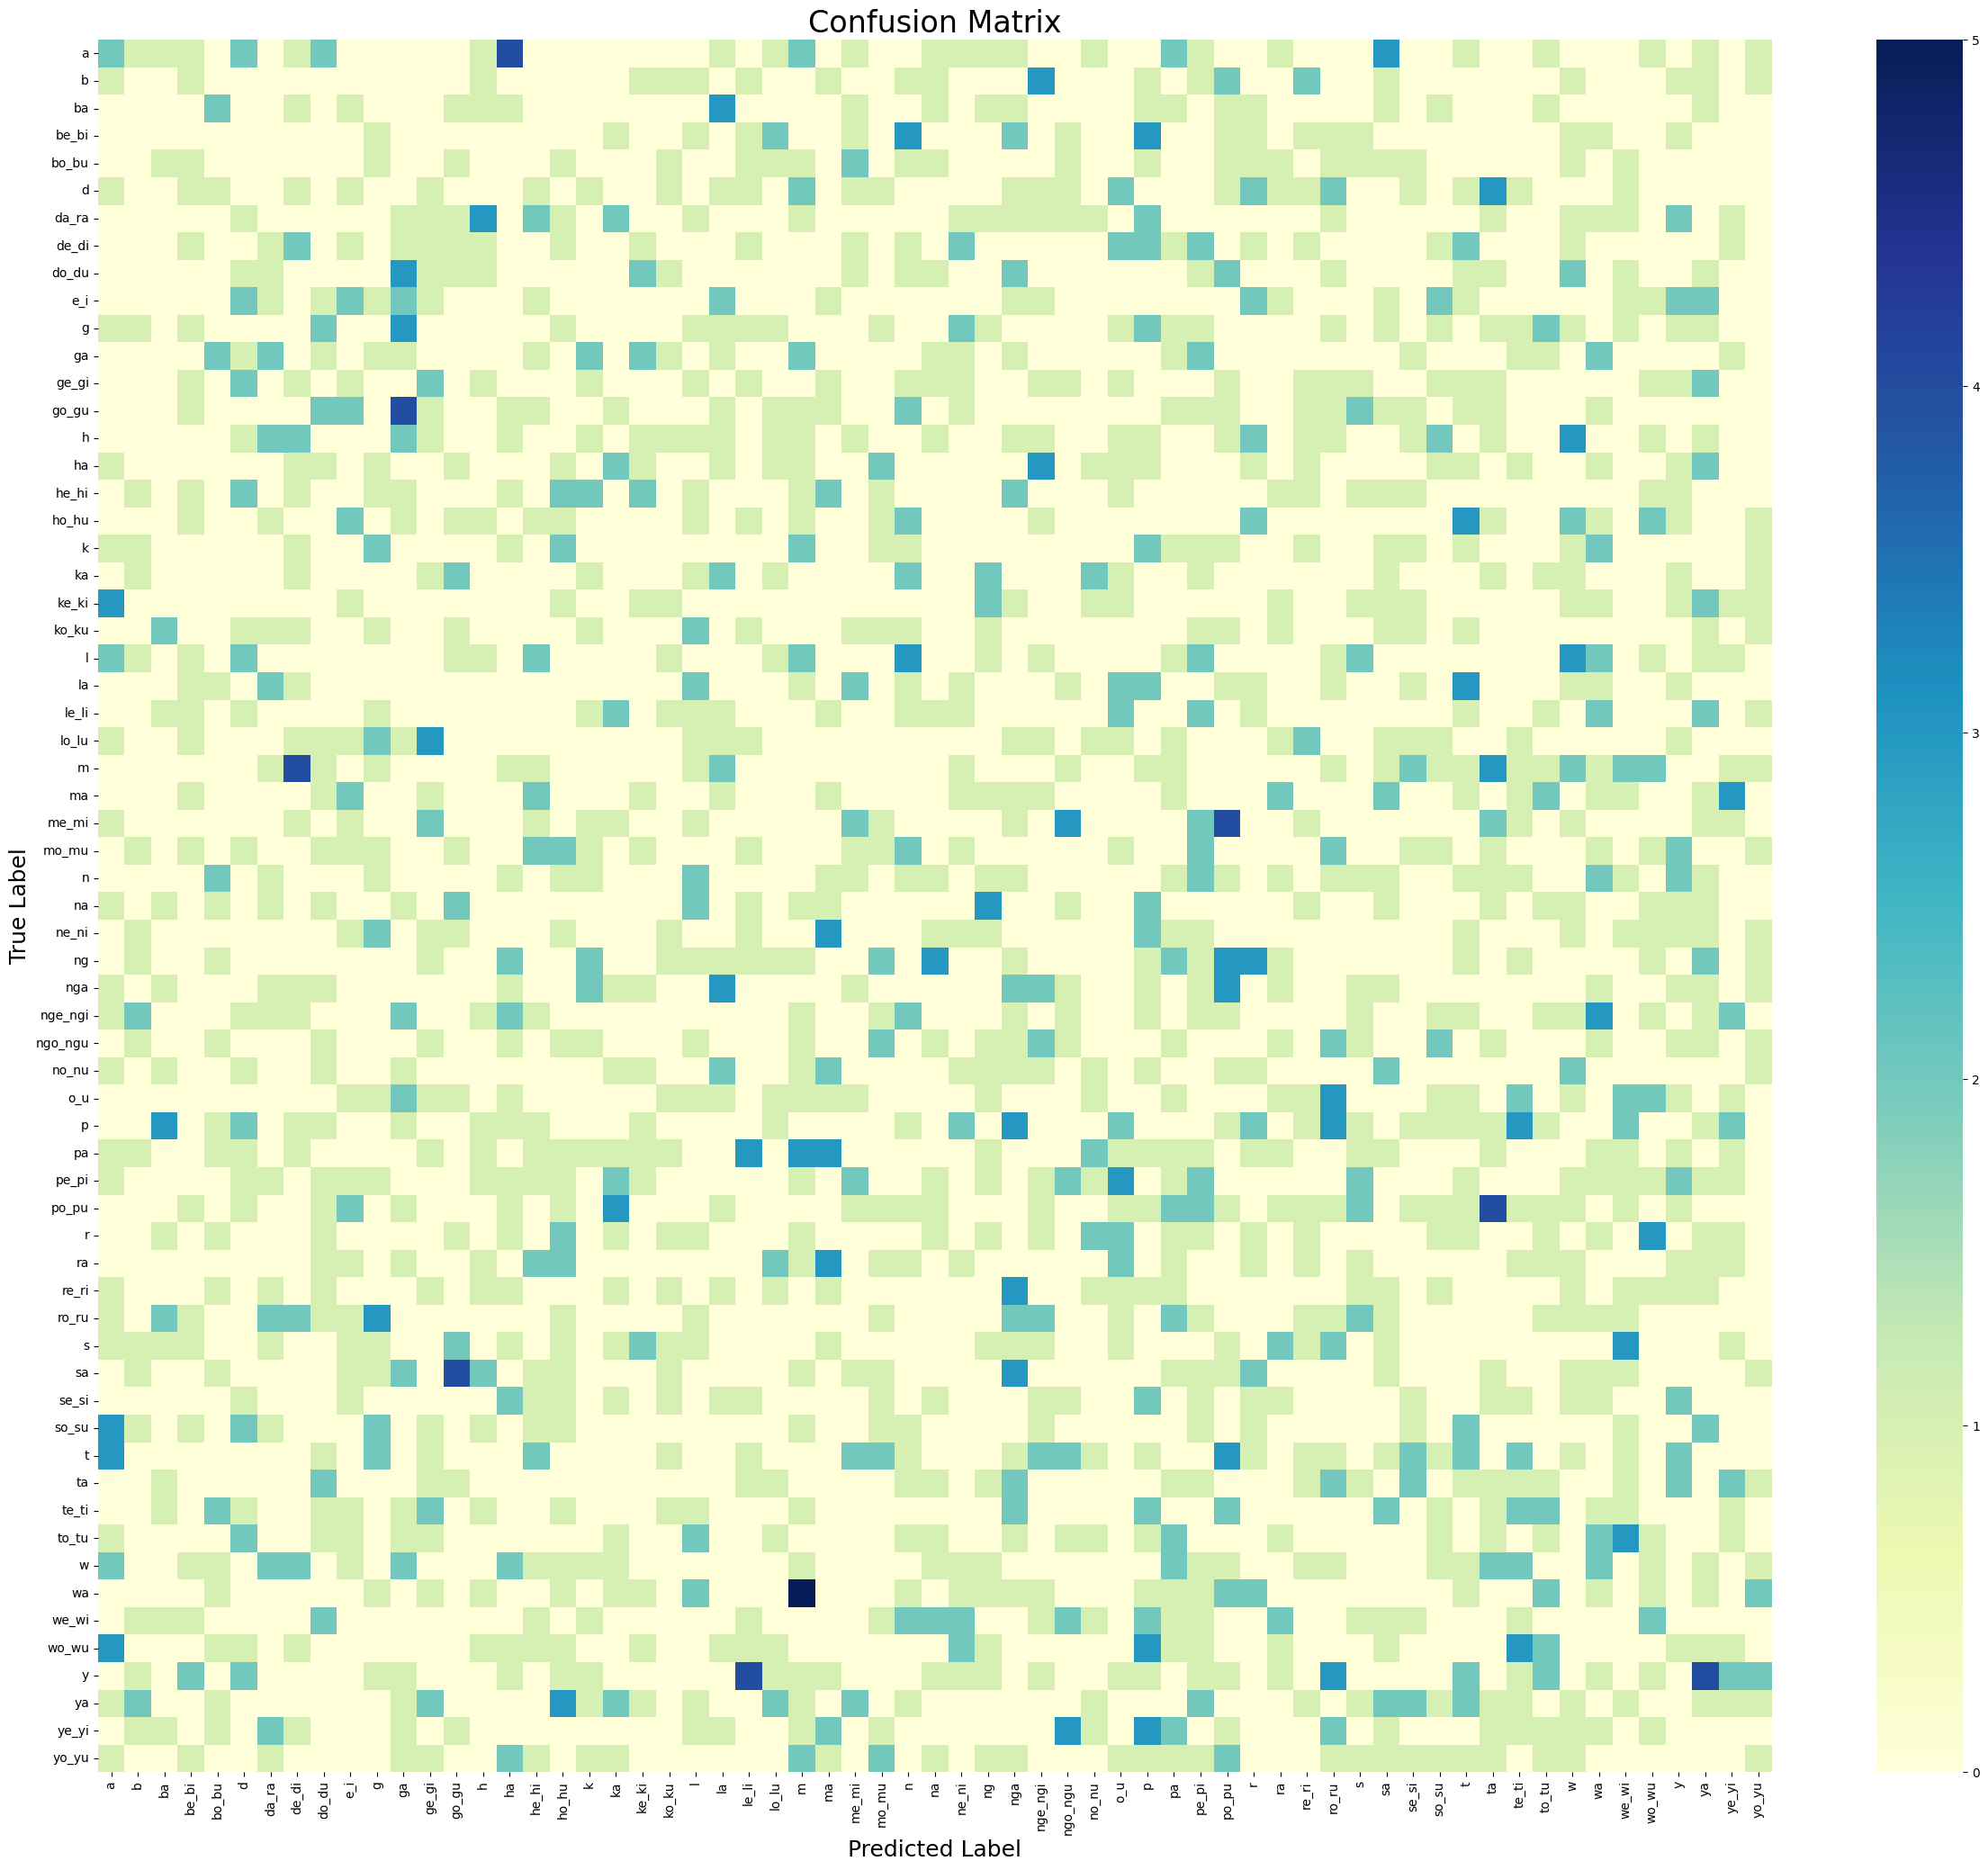

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_true, y_pred, and labels
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true labels
y_true = val_generator.classes

labels = list(train_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(30, 25))  # 🔥 increase this size to make it cleaner (30x25 for example)
sns.heatmap(cm, annot=False, fmt='d', cmap='YlGnBu',xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix", fontsize=24)
plt.xlabel("Predicted Label", fontsize=18)
plt.ylabel("True Label", fontsize=18)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.show()


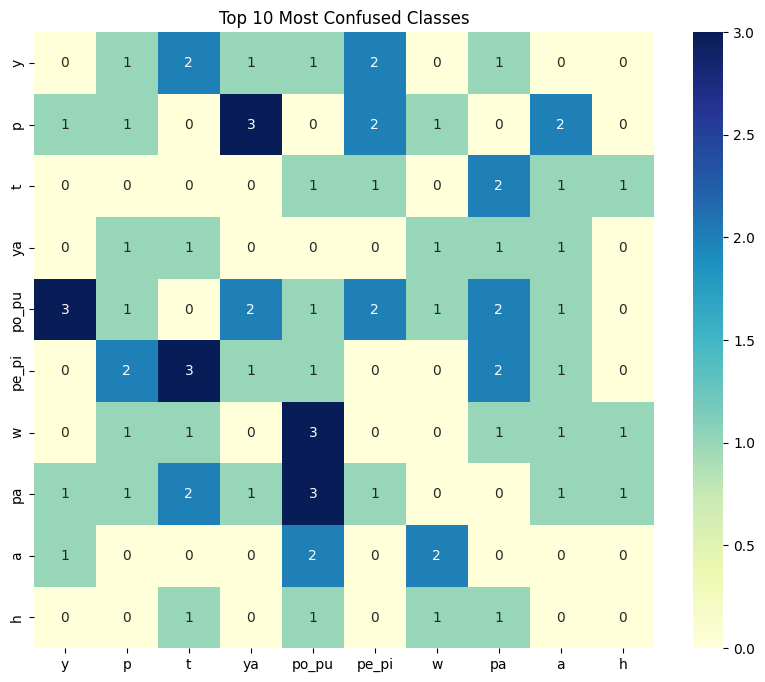

In [51]:
import seaborn as sns
import pandas as pd

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to DataFrame for easier handling
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Get total misclassifications per class
misclassified_counts = (cm_df.sum(axis=1) - np.diag(cm)).sort_values(ascending=False)

# Take top 10
top_classes = misclassified_counts.head(10).index.tolist()

# Subset confusion matrix
cm_top = cm_df.loc[top_classes, top_classes]

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(cm_top, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Top 10 Most Confused Classes")
plt.show()
